In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Task 1: Working with Series 
1. Create a Pandas Series from the following list:  
data = [25, 30, 35, 40, 45] 
2. Write a Python program to:  
o Assign custom indices ['A', 'B', 'C', 'D', 'E'] to the Series. 
o Display the first three elements of the Series. 
o Calculate the mean, median, and standard deviation of the 
Series. 

In [3]:
data = [25, 30, 35, 40, 45]
series = pd.Series(data, index=['A', 'B', 'C', 'D', 'E'])
print(series)

A    25
B    30
C    35
D    40
E    45
dtype: int64


In [4]:
print('First three :\n',series.head(3))

First three :
 A    25
B    30
C    35
dtype: int64


In [5]:
mean = series.mean()
med = series.median()
std = series.std()

print("Mean :",mean)
print('Median :',med)
print("Standard Deviation ;",std)

Mean : 35.0
Median : 35.0
Standard Deviation ; 7.905694150420948


Task 2: Creating and Inspecting DataFrames 
1. Create a Pandas DataFrame with the following data: 
Name Age Gender Marks 
Alice 20 Female 85 
Bob 22 Male 78 
Carol 19 Female 92 
David 21 Male 74 
Eve 20 Female 88 
2. Write a Python program to: 
o Display the first two rows of the DataFrame. 
o Display the column names, data types, and summary statistics. 
o Add a new column Passed that contains True if Marks >= 80 
and False otherwise. 

In [6]:

data = {
    'Name': ['Alice', 'Bob', 'Carol', 'David', 'Eve'],
    'Age': [20, 22, 19, 21, 20],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'Marks': [85, 78, 92, 74, 88]
}

df = pd.DataFrame(data)
df

,Name,Age,Gender,Marks
0,Alice,20,Female,85
1,Bob,22,Male,78
2,Carol,19,Female,92
3,David,21,Male,74
4,Eve,20,Female,88


In [7]:
print("First two row:\n")
df.head(2)

First two row:



,Name,Age,Gender,Marks
0,Alice,20,Female,85
1,Bob,22,Male,78


In [8]:
print("Column Names:", df.columns.tolist())
print()
print("Data Types:\n", df.dtypes)

Column Names: ['Name', 'Age', 'Gender', 'Marks']

Data Types:
 Name      object
Age        int64
Gender    object
Marks      int64
dtype: object


In [9]:
print("Summary Statistics")
df.describe()

Summary Statistics


,Age,Marks
count,5.000000,5.000000
mean,20.400000,83.400000
std,1.140175,7.334848
min,19.000000,74.000000
25%,20.000000,78.000000
50%,20.000000,85.000000
75%,21.000000,88.000000
max,22.000000,92.000000


In [10]:
df['Passed'] = df['Marks'] >= 80
df

,Name,Age,Gender,Marks,Passed
0,Alice,20,Female,85,True
1,Bob,22,Male,78,False
2,Carol,19,Female,92,True
3,David,21,Male,74,False
4,Eve,20,Female,88,True


Task 3: Data Selection and Filtering 
1. Using the DataFrame from Task 2, write a Python program to:  
o Select and display the Name and Marks columns. 
o Filter and display records where Marks > 80. 
o Display the record of the student with the highest marks.

In [11]:
df = pd.DataFrame(data)
df

,Name,Age,Gender,Marks
0,Alice,20,Female,85
1,Bob,22,Male,78
2,Carol,19,Female,92
3,David,21,Male,74
4,Eve,20,Female,88


In [12]:

print("Name and Marks columns:")
df[['Name', 'Marks']]

Name and Marks columns:


,Name,Marks
0,Alice,85
1,Bob,78
2,Carol,92
3,David,74
4,Eve,88


In [13]:
# Records where Marks > 80
fil_df = df[df['Marks'] > 80]
fil_df

,Name,Age,Gender,Marks
0,Alice,20,Female,85
2,Carol,19,Female,92
4,Eve,20,Female,88


In [14]:
# Display the record of the student with the highest marks
max_marks = df['Marks'].max()
student = df[df['Marks'] == max_marks]
student

,Name,Age,Gender,Marks
2,Carol,19,Female,92


Task 4: Handling Missing Data 
1. Modify the DataFrame from Task 2 by introducing missing values:  
2. df.loc[1, 'Marks'] = None 
3. df.loc[4, 'Age'] = None 
4. Write a Python program to:  
o Identify missing values in the DataFrame. 
o Fill missing values in the Marks column with the column's 
mean. 
o Drop rows where the Age column has missing values. 


In [15]:
df

,Name,Age,Gender,Marks
0,Alice,20,Female,85
1,Bob,22,Male,78
2,Carol,19,Female,92
3,David,21,Male,74
4,Eve,20,Female,88


In [16]:
df.loc[1, 'Marks'] = None
df.loc[4, 'Age'] = None

In [17]:
# Missing values in DataFrame:
df.isnull()

,Name,Age,Gender,Marks
0,False,False,False,False
1,False,False,False,True
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False


In [18]:
# DataFrame after filling missing 'Marks' with mean:
marks_mean = df['Marks'].mean()
df['Marks'].fillna(marks_mean, inplace=True)
df


C:\Users\HP\AppData\Local\Temp\ipykernel_6636\1157025162.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marks'].fillna(marks_mean, inplace=True)


,Name,Age,Gender,Marks
0,Alice,20.0,Female,85.00
1,Bob,22.0,Male,84.75
2,Carol,19.0,Female,92.00
3,David,21.0,Male,74.00
4,Eve,NaN,Female,88.00


In [19]:
# Drop rows where 'Age' is missing
df.dropna(subset=['Age'])

,Name,Age,Gender,Marks
0,Alice,20.0,Female,85.00
1,Bob,22.0,Male,84.75
2,Carol,19.0,Female,92.00
3,David,21.0,Male,74.00


Task 5: Grouping and Aggregation 
1. Using the DataFrame from Task 2, write a Python program to:  
o Group the data by Gender and calculate the mean age and 
marks for each gender. 
o Count the number of students in each gender group. 

In [20]:
df

,Name,Age,Gender,Marks
0,Alice,20.0,Female,85.00
1,Bob,22.0,Male,84.75
2,Carol,19.0,Female,92.00
3,David,21.0,Male,74.00
4,Eve,NaN,Female,88.00


In [21]:
# Mean Age and Marks for each Gender
mean_stats = df.groupby('Gender')[['Age', 'Marks']].mean()
mean_stats

,Age,Marks
Gender,,
Female,19.5,88.333333
Male,21.5,79.375000


In [22]:

# Number of students in each Gender group
c = df['Gender'].value_counts()
c

Gender
Female    3
Male      2
Name: count, dtype: int64

Task 6: Reading and Writing Data 
1. Write a Python program to:  
o Save the modified DataFrame from Task 4 to a CSV file named 
students_data.csv. 
o Read the CSV file into a new DataFrame. 
o Display the first five rows of the newly loaded DataFrame. 

In [23]:

data = {
    'Name': ['Alice', 'Bob', 'Carol', 'David', 'Eve'],
    'Age': [20, 22, 19, 21, None],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'Marks': [85, None, 92, 74, 88]
}
df = pd.DataFrame(data)
df

,Name,Age,Gender,Marks
0,Alice,20.0,Female,85.0
1,Bob,22.0,Male,NaN
2,Carol,19.0,Female,92.0
3,David,21.0,Male,74.0
4,Eve,NaN,Female,88.0


In [24]:
# Save to CSV
df.to_csv("students_data.csv", index=False)

In [25]:
# Read the CSV file into a new DataFrame
df_loaded = pd.read_csv("students_data.csv")
df_loaded

,Name,Age,Gender,Marks
0,Alice,20.0,Female,85.0
1,Bob,22.0,Male,NaN
2,Carol,19.0,Female,92.0
3,David,21.0,Male,74.0
4,Eve,NaN,Female,88.0


In [26]:
# first five rows
df_loaded.head(5)

,Name,Age,Gender,Marks
0,Alice,20.0,Female,85.0
1,Bob,22.0,Male,NaN
2,Carol,19.0,Female,92.0
3,David,21.0,Male,74.0
4,Eve,NaN,Female,88.0


ask 7: General 
1. Download a sample dataset from Kaggle or use any public dataset. 
2. Write a Python program to:  
o Load the dataset using Pandas. 
o Perform exploratory data analysis (EDA) by summarizing key 
statistics, checking for missing values, and visualizing data 
trends using Matplotlib or Seaborn. 
o Document your findings in Markdown or comments. 

In [28]:

df = pd.read_csv("Area_Population_Density_and_Population_2011_Census.csv")
df.columns = df.columns.str.strip()

df

,District,Geograpical Area (Sq.Kms),Population Density,Male,Female,Total,Percentage Share to Total Population,Rank
0,Mudalagi,397.0,538.0,107522.0,106249.0,213771.0,4.47,12.0
1,Jamakhandi,882.0,307.0,132591.0,131380.0,263971.0,13.97,3.0
2,Bilagi,781.0,206.0,80147.0,80147.0,160294.0,8.48,7.0
3,Mudhol,859.0,287.0,124999.0,125194.0,250193.0,13.24,4.0
4,Badami,1069.0,227.0,121871.0,119544.0,241415.0,12.77,5.0
5,Bagalkote,935.0,307.0,143220.0,141894.0,285114.0,15.09,1.0
6,Hungund,733.0,218.0,77228.0,75981.0,153209.0,8.11,8.0
7,Guledagudda,316.0,275.0,44877.0,44568.0,89445.0,4.73,9.0
8,Ilkal,626.0,258.0,84513.0,83616.0,168129.0,8.90,6.0
9,Rabakavi Banahatti,351.0,732.0,140665.0,137317.0,277982.0,14.71,2.0


In [29]:
print("First 5 Rows of the Dataset:\n")
df.head()

First 5 Rows of the Dataset:



,District,Geograpical Area (Sq.Kms),Population Density,Male,Female,Total,Percentage Share to Total Population,Rank
0,Mudalagi,397.0,538.0,107522.0,106249.0,213771.0,4.47,12.0
1,Jamakhandi,882.0,307.0,132591.0,131380.0,263971.0,13.97,3.0
2,Bilagi,781.0,206.0,80147.0,80147.0,160294.0,8.48,7.0
3,Mudhol,859.0,287.0,124999.0,125194.0,250193.0,13.24,4.0
4,Badami,1069.0,227.0,121871.0,119544.0,241415.0,12.77,5.0


In [30]:
# Clean column names (remove leading/trailing spaces)
df.columns.str.strip()

Index(['District', 'Geograpical Area (Sq.Kms)', 'Population Density', 'Male',
       'Female', 'Total', 'Percentage Share to Total Population', 'Rank'],
      dtype='object')

In [31]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   District                              11 non-null     object 
 1   Geograpical Area (Sq.Kms)             10 non-null     float64
 2   Population Density                    10 non-null     float64
 3   Male                                  10 non-null     float64
 4   Female                                10 non-null     float64
 5   Total                                 10 non-null     float64
 6   Percentage Share to Total Population  10 non-null     float64
 7   Rank                                  10 non-null     float64
dtypes: float64(7), object(1)
memory usage: 836.0+ bytes


In [32]:
print("Summary Statistics:")
df.describe(include='all')

Summary Statistics:


,District,Geograpical Area (Sq.Kms),Population Density,Male,Female,Total,Percentage Share to Total Population,Rank
count,11,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000
unique,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mudalagi,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,694.900000,335.500000,105763.300000,104589.000000,210352.300000,10.44700,5.70000
std,NaN,263.253764,168.064306,32664.279937,32127.752866,64785.531397,4.02039,3.40098
min,NaN,316.000000,206.000000,44877.000000,44568.000000,89445.000000,4.47000,1.00000
25%,NaN,454.250000,234.750000,81238.500000,81014.250000,162252.750000,8.20250,3.25000
50%,NaN,757.000000,281.000000,114696.500000,112896.500000,227593.000000,10.83500,5.50000
75%,NaN,876.250000,307.000000,130693.000000,129833.500000,260526.500000,13.78750,7.75000


In [33]:

# Missing Values in Each Column:
df.isnull().sum()

District                                0
Geograpical Area (Sq.Kms)               1
Population Density                      1
Male                                    1
Female                                  1
Total                                   1
Percentage Share to Total Population    1
Rank                                    1
dtype: int64

In [34]:
top10 =df.sort_values(by='Population Density', ascending=False).head(10)
top10

,District,Geograpical Area (Sq.Kms),Population Density,Male,Female,Total,Percentage Share to Total Population,Rank
9,Rabakavi Banahatti,351.0,732.0,140665.0,137317.0,277982.0,14.71,2.0
0,Mudalagi,397.0,538.0,107522.0,106249.0,213771.0,4.47,12.0
1,Jamakhandi,882.0,307.0,132591.0,131380.0,263971.0,13.97,3.0
5,Bagalkote,935.0,307.0,143220.0,141894.0,285114.0,15.09,1.0
3,Mudhol,859.0,287.0,124999.0,125194.0,250193.0,13.24,4.0
7,Guledagudda,316.0,275.0,44877.0,44568.0,89445.0,4.73,9.0
8,Ilkal,626.0,258.0,84513.0,83616.0,168129.0,8.90,6.0
4,Badami,1069.0,227.0,121871.0,119544.0,241415.0,12.77,5.0
6,Hungund,733.0,218.0,77228.0,75981.0,153209.0,8.11,8.0
2,Bilagi,781.0,206.0,80147.0,80147.0,160294.0,8.48,7.0


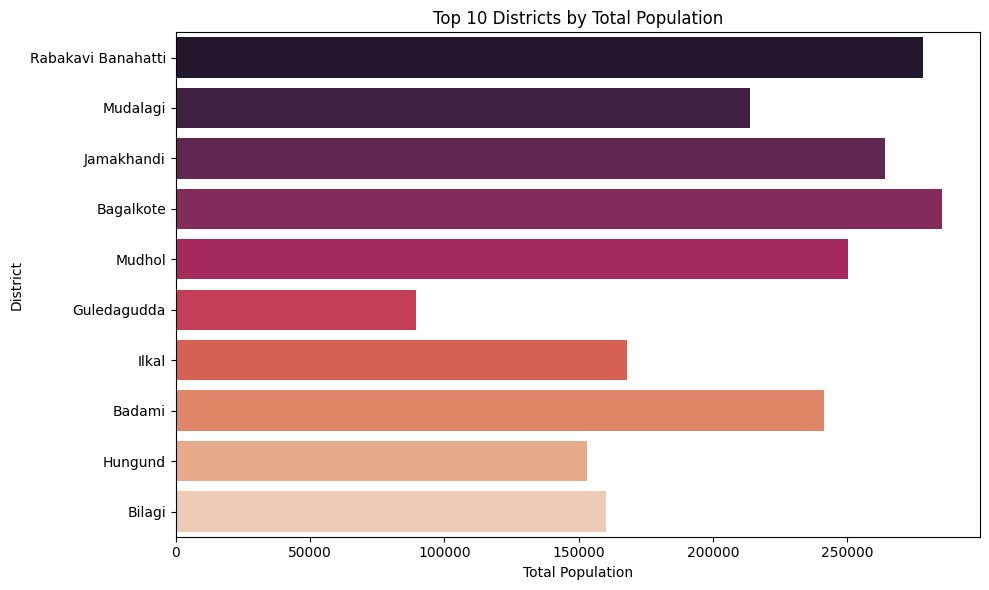

In [35]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='District', data=top10, hue='District', palette='rocket', legend=False)

plt.title('Top 10 Districts by Total Population')
plt.xlabel('Total Population')
plt.ylabel('District')
plt.tight_layout()
plt.show()

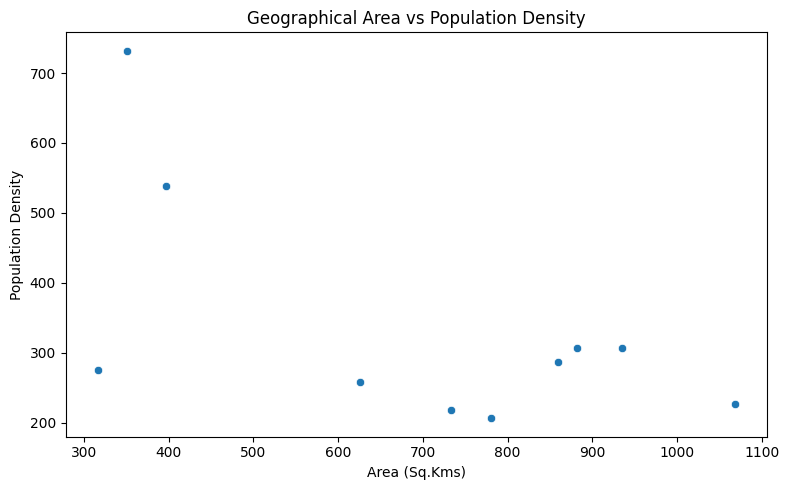

In [36]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Geograpical Area (Sq.Kms)', y='Population Density')
plt.title('Geographical Area vs Population Density')
plt.xlabel('Area (Sq.Kms)')
plt.ylabel('Population Density')
plt.tight_layout()
plt.show()